# Une astuce simple qui rendra tes Heatmaps plus élégantes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import matplotlib.colors as mcolors
import string

import seaborn as sns
sns.set()

plt.rcParams['font.family'] = ['Times New Roman', 'sans-serif']
plt.rcParams['figure.dpi'] = 144

### Données

In [2]:
values = np.array([[ 1. ,  0.5,  0.8,  0.5,  0.3, -0.7, -0.5, -0.5, -0.2, -0.1,  0.3],
                   [ 0.5,  1. ,  0.7,  0.8,  0.8, -0.2, -0.5, -0.9, -0.8, -0.8, -0.6],
                   [ 0.8,  0.7,  1. ,  0.8,  0.7, -0.6, -0.7, -0.9, -0.3, -0.2, -0.1],
                   [ 0.5,  0.8,  0.8,  1. ,  0.8, -0.6, -0.9, -0.9, -0.8, -0.4, -0.3],
                   [ 0.3,  0.8,  0.7,  0.8,  1. , -0.4, -0.8, -0.9, -0.8, -0.6, -0.5],
                   [-0.7, -0.2, -0.6, -0.6, -0.4,  1. ,  0.8,  0.5,  0.1, -0.3, -0.2],
                   [-0.5, -0.5, -0.7, -0.9, -0.8,  0.8,  1. ,  0.7,  0.5,  0.2,  0.2],
                   [-0.5, -0.9, -0.9, -0.9, -0.9,  0.5,  0.7,  1. ,  0.8,  0.7,  0.6],
                   [-0.2, -0.8, -0.3, -0.8, -0.8,  0.1,  0.5,  0.8,  1. ,  0.7,  0.7],
                   [-0.1, -0.8, -0.2, -0.4, -0.6, -0.3,  0.2,  0.7,  0.7,  1. ,  0.8],
                   [ 0.3, -0.6, -0.1, -0.3, -0.5, -0.2,  0.2,  0.6,  0.7,  0.8,  1. ]])

## rendre les données symétriques
values = (values + values.T - np.diag(np.diag(values)))/2
np.fill_diagonal(values, 1)

corr_matrix = pd.DataFrame(values, columns = list(string.ascii_uppercase[:values.shape[1]]))
corr_matrix

,A,B,C,D,E,F,G,H,I,J,K
0,1.0,0.5,0.8,0.5,0.3,-0.7,-0.5,-0.5,-0.2,-0.1,0.3
1,0.5,1.0,0.7,0.8,0.8,-0.2,-0.5,-0.9,-0.8,-0.8,-0.6
2,0.8,0.7,1.0,0.8,0.7,-0.6,-0.7,-0.9,-0.3,-0.2,-0.1
3,0.5,0.8,0.8,1.0,0.8,-0.6,-0.9,-0.9,-0.8,-0.4,-0.3
4,0.3,0.8,0.7,0.8,1.0,-0.4,-0.8,-0.9,-0.8,-0.6,-0.5
5,-0.7,-0.2,-0.6,-0.6,-0.4,1.0,0.8,0.5,0.1,-0.3,-0.2
6,-0.5,-0.5,-0.7,-0.9,-0.8,0.8,1.0,0.7,0.5,0.2,0.2
7,-0.5,-0.9,-0.9,-0.9,-0.9,0.5,0.7,1.0,0.8,0.7,0.6
8,-0.2,-0.8,-0.3,-0.8,-0.8,0.1,0.5,0.8,1.0,0.7,0.7
9,-0.1,-0.8,-0.2,-0.4,-0.6,-0.3,0.2,0.7,0.7,1.0,0.8


### Heatmap normal

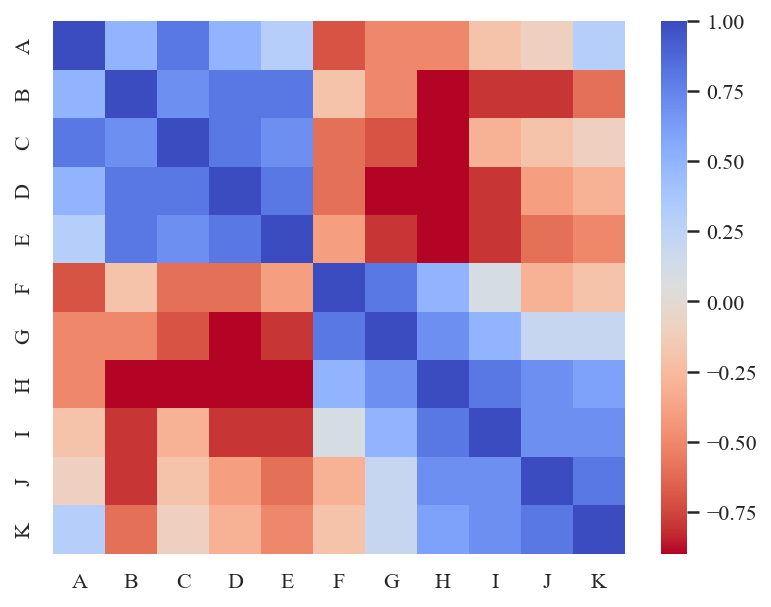

In [3]:
corr_matrix_new = corr_matrix.set_index(corr_matrix.columns)
sns.heatmap(corr_matrix_new, cmap='coolwarm_r');

## Heartmap encodée par taille

### 1. Cercle

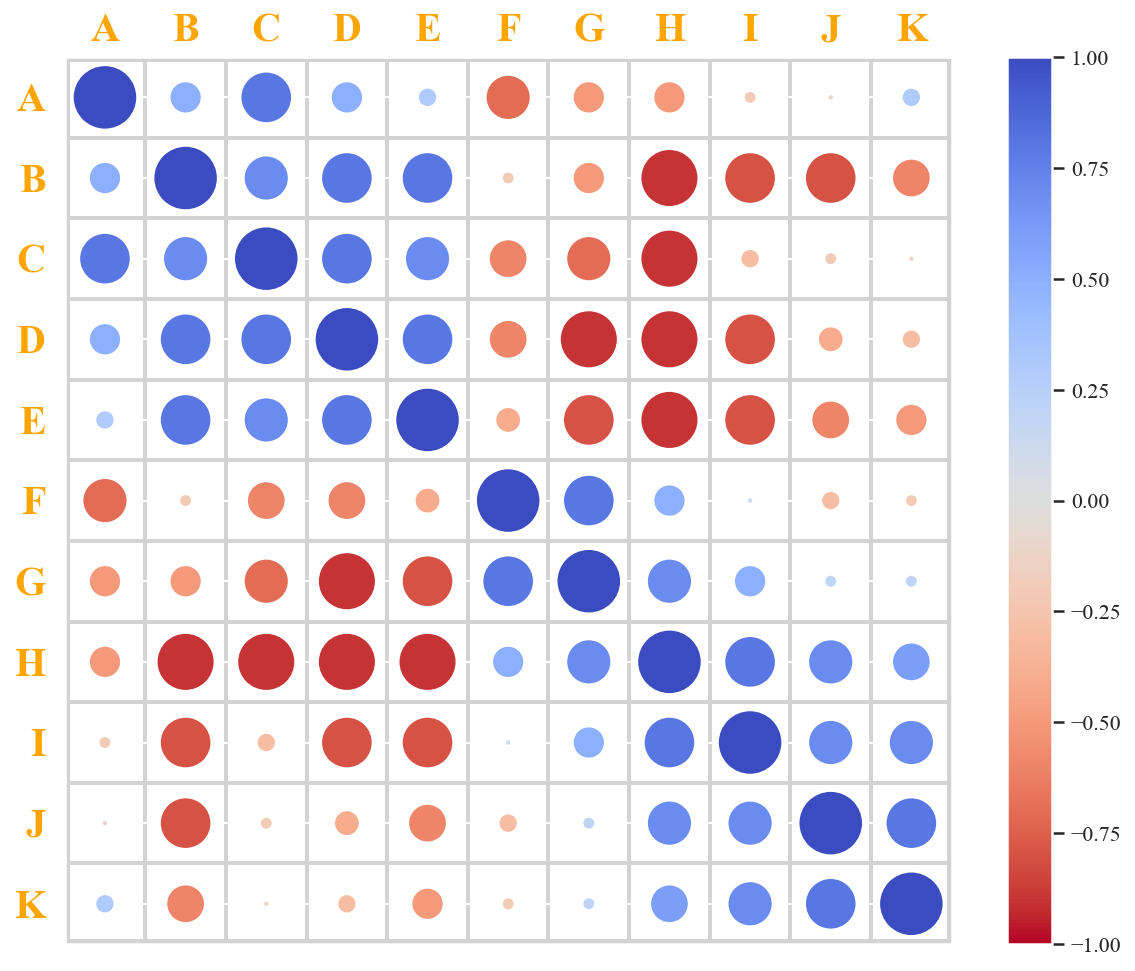

In [4]:
# créer une grille vierge ayant les mêmes dimensions que la matrice de corrélation
fig, ax = plt.subplots(figsize=(10,8))
ax.set_facecolor('white')
ax.imshow(np.ones_like(corr_matrix), cmap='gray_r', interpolation='nearest')

# définir les étiquettes et la rotation des axes x et y
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))

# déplacer les ticks de l'axe des x vers le haut du graphique
ax.tick_params(axis='x', which='both', labelbottom=False, labeltop=True, bottom=False, top=True, length=0)

# format des ticks
ax.set_yticklabels(corr_matrix.columns, fontsize=20, color = "orange", fontweight = "bold")
ax.set_xticklabels(corr_matrix.columns, fontsize=20, color = "orange", fontweight = "bold")


# créer des lignes de grille entre les étiquettes de ticks
ax.set_xticks(np.arange(len(corr_matrix.columns) + 1) - .5, minor=True)
ax.set_yticks(np.arange(len(corr_matrix.columns) + 1) - .5, minor=True)
ax.grid(which="minor", color="lightgray", linestyle="solid", linewidth=2, )

# ajouter un rectangle autour de la grille
rect = plt.Rectangle((-.5, -.5), len(corr_matrix.columns), len(corr_matrix.columns), linewidth=5, edgecolor='lightgray', facecolor='none')
ax.add_patch(rect)

# créer des cercles dont le rayon est proportionnel à la valeur absolue de la corrélation
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        correlation = corr_matrix.iat[i, j]
        norm = plt.Normalize(-1, 1)  # specify the range of values for the colormap
        sm = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm_r')
        color = sm.to_rgba(correlation)
        circle = Circle((i, j), radius=abs(correlation)/2.5, facecolor=color)
        ax.add_patch(circle)

# ajouter une barre de couleur
norm = mcolors.Normalize(vmin=-1, vmax=1)
c_scale = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm_r')
cbar = plt.colorbar(c_scale, ax=ax)
plt.show()

### 2. Carré

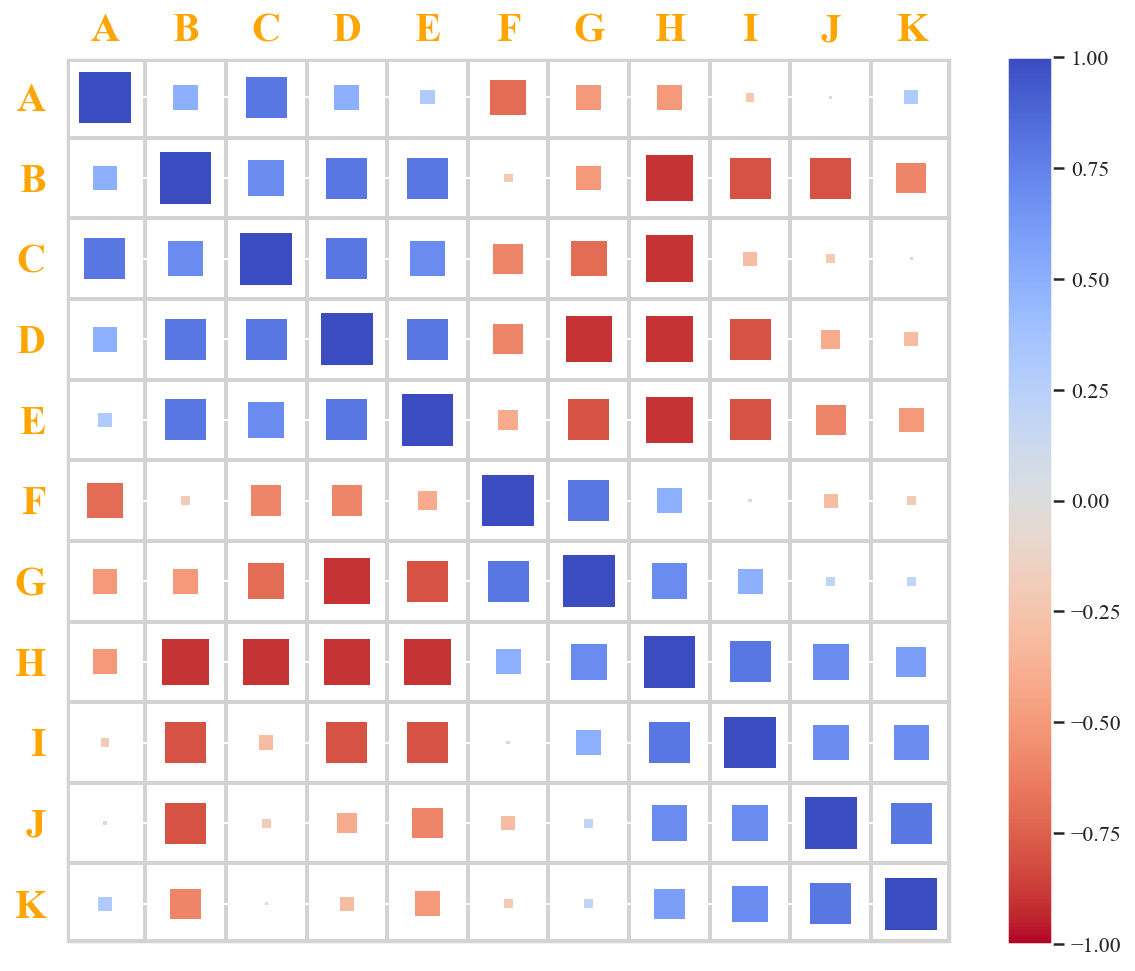

In [5]:
# créer une grille blanche ayant les mêmes dimensions que la matrice de corrélation
fig, ax = plt.subplots(figsize=(10,8))
ax.set_facecolor('white')
ax.imshow(np.ones_like(corr_matrix), cmap='gray_r', interpolation='nearest')

# définir les étiquettes et la rotation des axes x et y
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))

# déplacer les ticks de l'axe des x vers le haut du graphique
ax.tick_params(axis='x', which='both', labelbottom=False, labeltop=True, bottom=False, top=True, length=0)

# format des ticks
ax.set_yticklabels(corr_matrix.columns, fontsize=20, color = "orange", fontweight = "bold")
ax.set_xticklabels(corr_matrix.columns, fontsize=20, color = "orange", fontweight = "bold")


# créer des lignes de grille entre les étiquettes de ticks
ax.set_xticks(np.arange(len(corr_matrix.columns) + 1) - .5, minor=True)
ax.set_yticks(np.arange(len(corr_matrix.columns) + 1) - .5, minor=True)
ax.grid(which="minor", color="lightgray", linestyle="solid", linewidth=2, )

# ajouter un rectangle autour de la grille
rect = plt.Rectangle((-.5, -.5), len(corr_matrix.columns), len(corr_matrix.columns), linewidth=5, edgecolor='lightgray', facecolor='none')
ax.add_patch(rect)

# créer des carrés dont le rayon est proportionnel à la valeur absolue de la corrélation
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        correlation = corr_matrix.iat[i, j]
        norm = plt.Normalize(-1, 1)  # specify the range of values for the colormap
        sm = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm_r')
        color = sm.to_rgba(correlation)
        size = abs(correlation)/1.5
        rect = Rectangle(xy=(i-size/2, j-size/2), width=size, height=size, facecolor=color)
        ax.add_patch(rect)

# ajouter une barre de couleur
norm = mcolors.Normalize(vmin=-1, vmax=1)
c_scale = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm_r')
cbar = plt.colorbar(c_scale, ax=ax)
plt.show()